# ECE 590, Fall 2019 
## Problem Set 1 
* ### __Important :__  You are only allowed to use the Python built in function for generating uniform random variables.

## Full name: 


### Problem 1 (Exponential distribution)

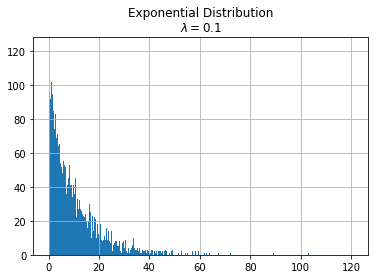

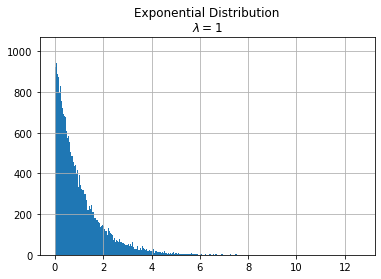

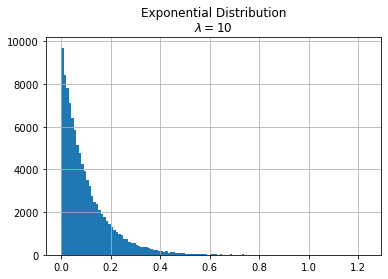

In [2]:
# Put your code here
%matplotlib inline
import random
import math
import numpy as np
from matplotlib import pyplot as plt

class Exp_Distribution():
    def __init__(self):
        # initial distribution with parameter
        self.Lambda = None
        
    def generate_(self):
        # generate one random variable
        assert(self.Lambda is not None)
        U = random.random()
        return -math.log(1-U)/self.Lambda
    
    def generate(self, Lambda, num):
        result = []
        self.Lambda = Lambda
        for i in range(num):
            result.append(self.generate_())    
        return result
    
exp_dis = Exp_Distribution()
# lambda = 0.1
Lambda = 0.1
binwidth = 0.01
samples_num = 10**5
data = exp_dis.generate(Lambda=Lambda, num=samples_num)
fig = plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Exponential Distribution\n'+r'$\lambda = 0.1$')
plt.show()

# lambda = 1
Lambda = 1
binwidth = 0.01
samples_num = 10**5
data = exp_dis.generate(Lambda=Lambda, num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Exponential Distribution\n'+r'$\lambda = 1$')
plt.show()

# lambda = 10
Lambda = 10
binwidth = 0.01
samples_num = 10**5
data = exp_dis.generate(Lambda=Lambda, num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Exponential Distribution\n'+r'$\lambda = 10$')
plt.show()

### Problem 2 (Gamma distribution)

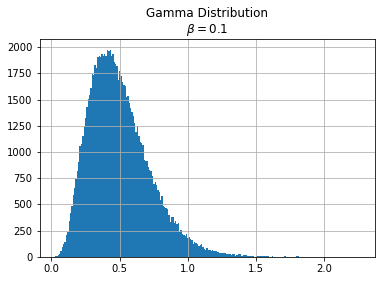

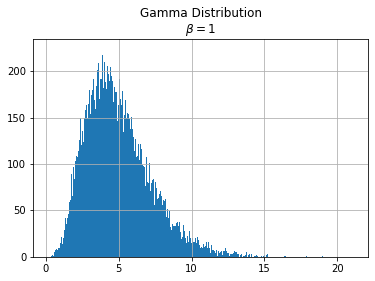

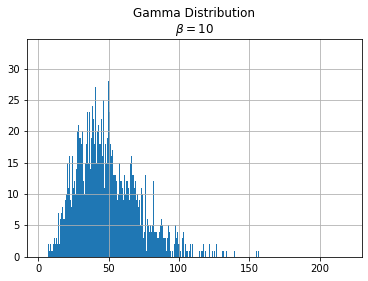

In [3]:
# Put your code here 
class Gamma_Distribution():
    def __init__(self):
        self.K = None
        self.beta = None
        
    def generate_(self):
        exp_dis = Exp_Distribution()
        r = exp_dis.generate(Lambda=1/self.beta, num=self.K)
        return sum(r)
    
    def generate(self, K, beta, num):
        self.K = K
        self.beta = beta
        
        result = []
        for _ in range(num):
            result.append(self.generate_())
        return result
    
gamma_dis = Gamma_Distribution()

# beta = 0.1
beta = 0.1
binwidth = 0.01
samples_num = 10**5
data = gamma_dis.generate(K=5, beta=0.1, num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Gamma Distribution\n'+r'$\beta = 0.1$')
plt.show()

# beta = 1
beta = 1
binwidth = 0.01
samples_num = 10**5
data = gamma_dis.generate(K=5, beta=beta, num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Gamma Distribution\n'+r'$\beta = 1$')
plt.show()

# beta = 10
beta = 10
binwidth = 0.01
samples_num = 10**5
data = gamma_dis.generate(K=5, beta=beta, num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Gamma Distribution\n'+r'$\beta = 10$')
plt.show()

### Problem 3 (Beta distribution)

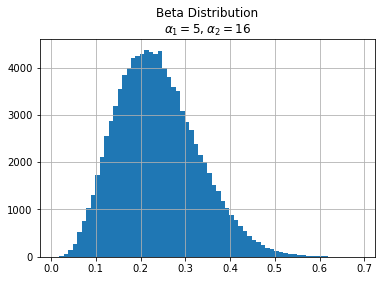

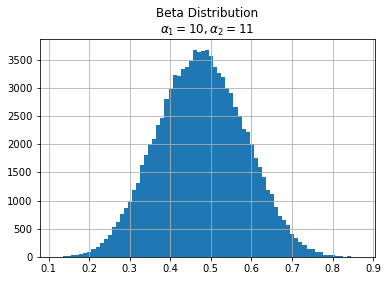

In [4]:
# Put your code here 
import numpy as np

class Beta_Distribution():
    def __init__(self):
        self.alpha_1 = None
        self.alpha_2 = None
    
    def generate_(self):
        n = self.alpha_2 - 1 + self.alpha_1
        k = self.alpha_1
        Us = np.sort(np.random.uniform(0, 1, n))
        return Us[k-1]
    
    def generate(self, alpha_1, alpha_2, num):
        self.alpha_1 = alpha_1
        self.alpha_2 = alpha_2
        
        result = []
        for _ in range(num):
            result.append(self.generate_())
        return result
    
beta_dis = Beta_Distribution()

# alpha_1 = 5, alpha_2 = 16
alpha_1 = 5
alpha_2 = 16
binwidth = 0.01
samples_num = 10**5
data = beta_dis.generate(alpha_1 = alpha_1,
                         alpha_2 = alpha_2,
                         num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Beta Distribution\n'+r'$\alpha_1 = 5, \alpha_2 = 16$')
plt.show()

# alpha_1 = 10, alpha_2 = 11
alpha_1 = 10
alpha_2 = 11
data = beta_dis.generate(alpha_1 = alpha_1,
                         alpha_2 = alpha_2,
                         num=samples_num)
plt.figure()
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
plt.grid()
plt.title('Beta Distribution\n'+r'$\alpha_1 = 10, \alpha_2 = 11$')
plt.show()

### Problem 4 (Dirichlet distribution)

In [5]:
# Put your code here 
class Dirichlet_Distribution():
    def __init__(self):
        self.alpha_i = None
        
    def generate_(self):
        gamma_dis = Gamma_Distribution()
        beta = 1
        Ys = []
        N = len(self.alpha_i)
        for i in range(N):
            Ys.append(gamma_dis.generate(self.alpha_i[i], beta, 1)[0])
        s = sum(Ys)
        return [i/s for i in Ys]
    
    def generate(self, alpha_i, num):
        self.alpha_i = alpha_i
        result = []
        for _ in range(num):
            result.append(self.generate_())
            
        return result

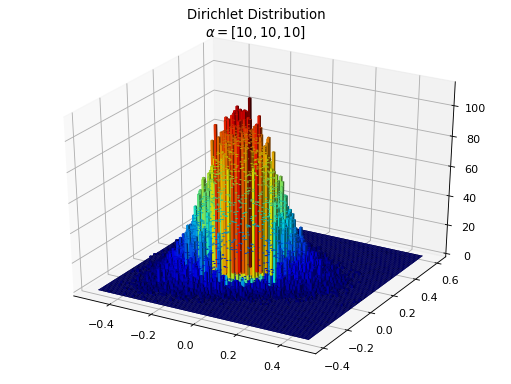

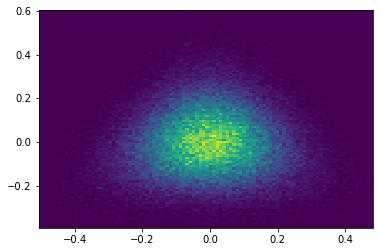

In [57]:
dirichlet_dis = Dirichlet_Distribution()

# alpha = [10, 10, 10]
alpha = [10, 10, 10]
binwidth = 0.01
samples_num = 10**5
trans_matrix = np.array([[0, np.sqrt(3)/2, -np.sqrt(3)/2],
               [1, -0.5, -0.5]])
data = np.array(dirichlet_dis.generate(alpha, samples_num))
data_projection = np.matmul(trans_matrix, data.T)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x, y = data_projection[0, :], data_projection[1, :]
fig = plt.figure(num=None, figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=(100,100)) 
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title('Dirichlet Distribution\n'+r'$\alpha = [10,10,10]$')
plt.show()

a = plt.hist2d(data_projection[0, :], data_projection[1, :], bins=100)

## Dirichlet distribution Stick Simulation

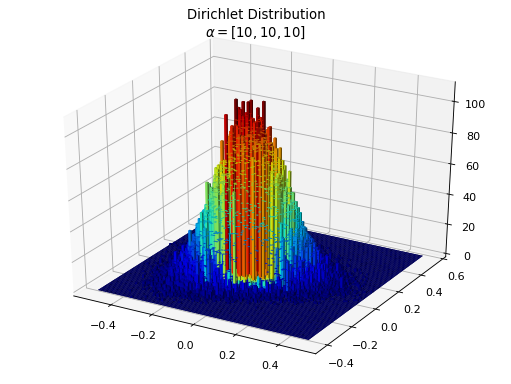

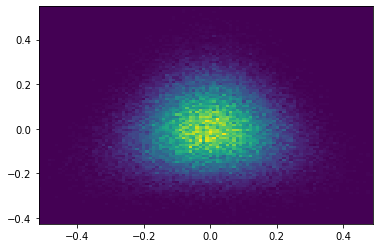

In [56]:
def Stick_Simulate(alpha, num):
    Ys = []
    for _ in range(num):
        Xs = [beta_dis.generate(alpha[i],sum(alpha[i+1:]),1)[0] for i in range(len(alpha)-1)]
        Y = []
        Y.append(Xs[0])
        Y.append((1-Xs[0])*Xs[1])
        Y.append((1-Xs[0])*(1-Xs[1]))
        Ys.append(Y)
    return np.array(Ys)

data = Stick_Simulate(alpha,samples_num)

data_projection = np.matmul(trans_matrix, data.T)


x, y = data_projection[0, :], data_projection[1, :]
fig = plt.figure(num=None, figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=(100,100)) 
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title('Dirichlet Distribution\n'+r'$\alpha = [10,10,10]$')
plt.show()

a = plt.hist2d(data_projection[0, :], data_projection[1, :], bins=100)